In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif 


from sklearn.linear_model import LinearRegression # importa o modelo
#from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
#from scipy.stats import normaltest

In [2]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']
data = pd.read_csv(url_file, sep='\t', header=None, names=columns)
data.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


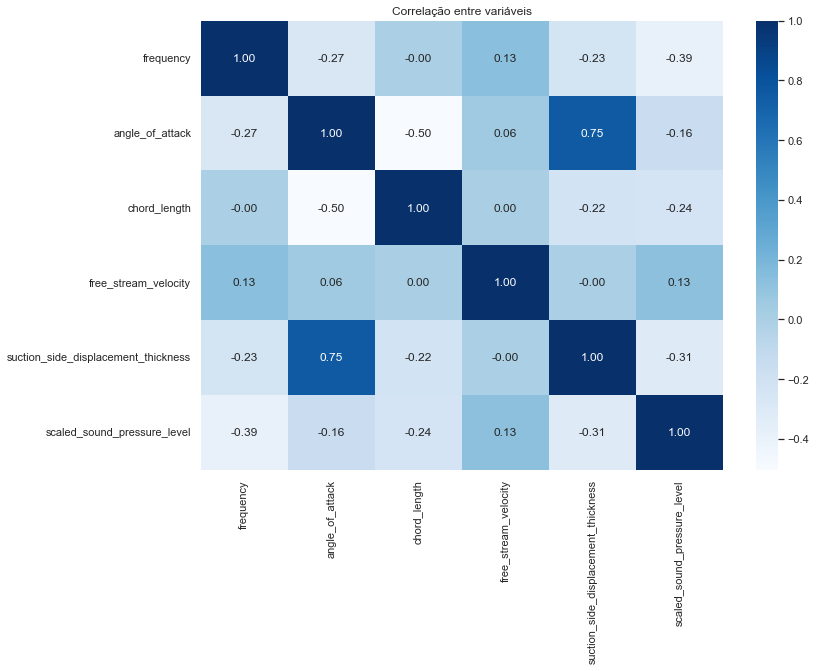

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot = True,fmt = '.2f',cmap = 'Blues')
plt.title('Correlação entre variáveis')
plt.show()

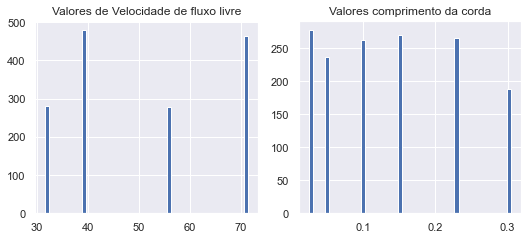

In [5]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

hist1 = data.free_stream_velocity #.hist(bins = 50, label = 'Velocidade de fluxo livre')
hist2 = data.chord_length #.hist(bins =50, label = " Comprimento da corda")

fig, axes = plt.subplots(1,2)

axes[0].set_title("Valores de Velocidade de fluxo livre")
hist1.hist(label ='Velocidade de fluxo livre',bins =50, ax=axes[0])

axes[1].set_title("Valores comprimento da corda")
hist2.hist(label = " Comprimento da corda",bins =50, ax=axes[1])

plt.show()


In [6]:
X = data[['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness' ]]
y = data['scaled_sound_pressure_level']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
selector = SelectKBest(score_func= f_regression, k=3)
variaveis = selector.fit_transform(X_train, y_train)
print(variaveis.shape)

(1052, 3)


In [9]:
filter = selector.get_support()
print(filter)
features =['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness' ]

print("All features:")
print(features)
 

print("Selected best 3:")
i=0

while i < len(features):
    if filter[i] : 
        print(features[i], end = ', ')
    i= i+1

 

[ True False  True False  True]
All features:
['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 'suction_side_displacement_thickness']
Selected best 3:
frequency, chord_length, suction_side_displacement_thickness, 

In [10]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

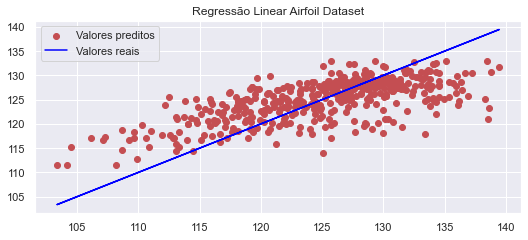

In [18]:
plt.scatter(y_test, y_pred, color='r')
plt.plot(y_test, y_test, color= 'blue')
plt.legend(['Valores preditos','Valores reais'])
plt.title("Regressão Linear Airfoil Dataset")
plt.show()

In [12]:
print('Erro médio absoluto: %.2f' % mean_absolute_error(y_test, y_pred))
print('Erro quadrado médio: %.2f' % mean_squared_error(y_test, y_pred))


Erro médio absoluto: 3.67
Erro quadrado médio: 22.40


In [13]:
model = KNeighborsRegressor(n_neighbors=8).fit(X, y)
y_pred = model.predict(X_test)

In [14]:
print('Erro médio absoluto: %.2f' % mean_absolute_error(y_test, y_pred))
print('Erro quadrado médio: %.2f' % mean_squared_error(y_test, y_pred))

Erro médio absoluto: 3.94
Erro quadrado médio: 25.35


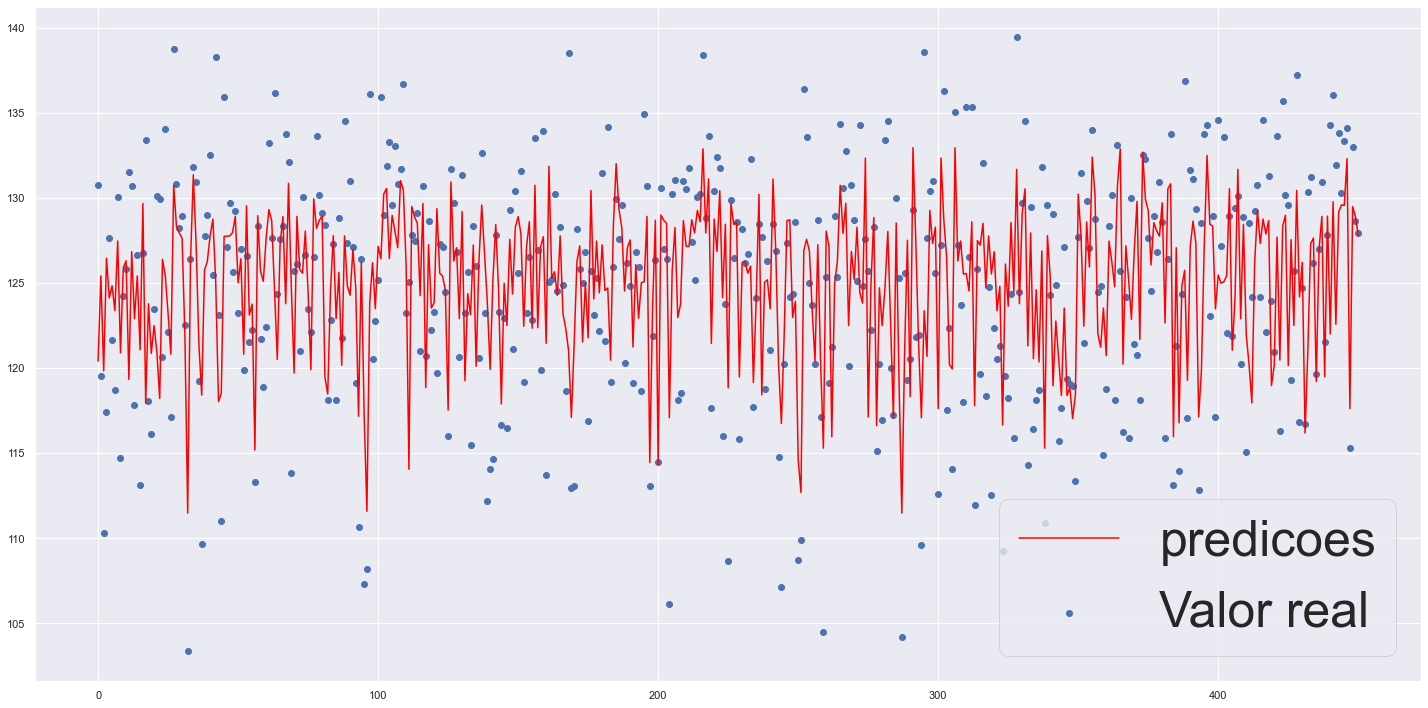

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.scatter(range(len(y_pred)),y_test)
plt.legend(["predicoes","Valor real"],  fontsize = 50)